In [19]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier


# Loading the dataset
dataset = pd.read_csv('/Users/payalmehta/Downloads/loan.csv',nrows=200000,low_memory=False)

#Removing irrelavant , redundant columns
dataset.drop('id',axis=1,inplace=True)
dataset.drop('member_id',axis=1,inplace=True)
dataset.drop('emp_title',axis=1,inplace=True)
dataset.drop('zip_code',axis=1,inplace=True)
dataset.drop('title',axis=1,inplace=True)
dataset.drop('out_prncp',axis=1,inplace=True)
dataset.drop('out_prncp_inv',axis=1,inplace=True)
dataset.drop('total_pymnt',axis=1,inplace=True)
dataset.drop('total_pymnt_inv',axis=1,inplace=True)
dataset.drop('last_pymnt_d',axis=1,inplace=True)
dataset.drop('last_pymnt_amnt',axis=1,inplace=True)
dataset.drop('next_pymnt_d',axis=1,inplace=True)
dataset.drop('total_rec_late_fee',axis=1,inplace=True)
dataset.drop('total_rec_int',axis=1,inplace=True)
dataset.drop('issue_d',axis=1,inplace=True)
dataset.drop('url',axis=1,inplace=True)
dataset.drop('recoveries',axis=1,inplace=True)
dataset.drop('collection_recovery_fee',axis=1,inplace=True)
dataset.drop('total_rec_prncp',axis=1,inplace=True)


dataset.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,10+ years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Checking types of loan status
dataset['loan_status'].value_counts()

#Only Fully Paid and Charged Off are needed
x = dataset[dataset.loan_status =="Fully Paid"]
y = dataset[dataset.loan_status =="Charged Off"]
dataset = x.append(y)

#deleting columns that never change values
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
                      
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,5 years,MORTGAGE,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,< 1 year,MORTGAGE,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,10+ years,MORTGAGE,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
186,4500,4500,4500.0,36 months,11.31,147.99,B,B3,10+ years,RENT,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
215,8425,8425,8425.0,36 months,27.27,345.18,E,E5,3 years,MORTGAGE,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Getting Discrete columns
discrete_columns=[]
for column in dataset.columns:
    if str(dataset[column].dtype)=="object":
        discrete_columns.append(column)

#Getting unique counts of Discrete columns        
unique_value_counts=dataset[discrete_columns].apply(lambda x:(x.unique().shape[0]),axis=0).values
unique_value_counts=pd.DataFrame({"column":discrete_columns,"unique_count":unique_value_counts})
unique_value_counts



,column,unique_count
0,term,2
1,grade,7
2,sub_grade,35
3,emp_length,12
4,home_ownership,4
5,verification_status,3
6,loan_status,2
7,purpose,12
8,addr_state,50
9,earliest_cr_line,486


In [22]:
#Deleting columns with more than 30 categories
cols=unique_value_counts[unique_value_counts['unique_count']>30]['column']
for col in cols:
    dataset.drop(col,axis=1,inplace=True)
    
#deleting columns which change value only once 
dataset.drop('application_type',axis=1,inplace=True)
    
#deleting columns that have more than 30% as null    
columns=dataset.columns
missing_counts=dataset.apply(lambda x:np.sum(x.isnull()),axis=0).values
missing_counts_table=pd.DataFrame({"column":columns,"missing_count":missing_counts})
higher_missing_counts=missing_counts_table[missing_counts_table['missing_count']>0.2*dataset.shape[0]]
dataset.drop(higher_missing_counts['column'].values,axis=1,inplace=True)
missing_counts_table


,column,missing_count
0,loan_amnt,0
1,funded_amnt,0
2,funded_amnt_inv,0
3,term,0
4,int_rate,0
...,...,...
108,settlement_status,7186
109,settlement_date,7186
110,settlement_amount,7186
111,settlement_percentage,7186


In [23]:
#finding number of missing count for remaining columns which needs to be imputed
missing_counts_table=missing_counts_table[missing_counts_table['missing_count']<0.2*dataset.shape[0]]
missing_counts_table


,column,missing_count
0,loan_amnt,0
1,funded_amnt,0
2,funded_amnt_inv,0
3,term,0
4,int_rate,0
...,...,...
78,tot_hi_cred_lim,0
79,total_bal_ex_mort,0
80,total_bc_limit,0
81,total_il_high_credit_limit,0


In [24]:
#emp_length preprocessing to remove string
emp_length= dataset['emp_length'].str.extract('(\d+)').astype(float)
dataset.drop('emp_length',axis=1,inplace=True)
dataset['emp_length'] = emp_length

#imputing employee length with 0
dataset['emp_length'].fillna(0,inplace=True)

dataset['emp_length'].head(10)

100     5.0
152     1.0
170    10.0
186    10.0
215     3.0
269     4.0
271    10.0
296     5.0
369     5.0
379     4.0
Name: emp_length, dtype: float64

Text(0.5, 1.0, 'revol_util')

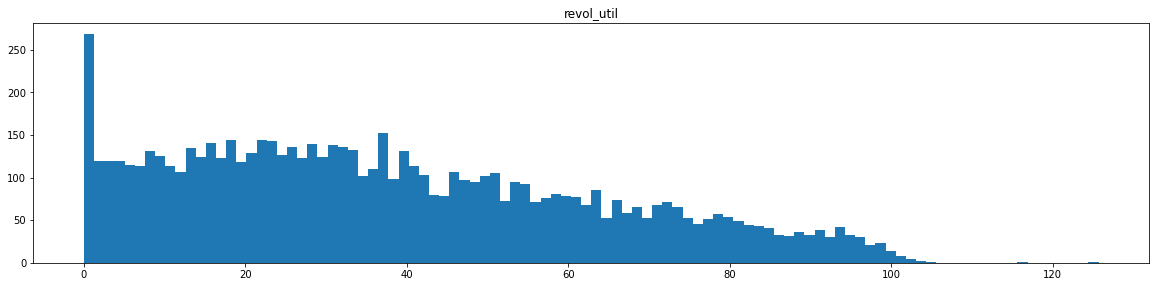

In [25]:
#histogram for data distribution
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.hist(dataset['revol_util'].dropna(),bins=100);
plt.title("revol_util")


In [26]:
#imputing with mean
dataset['revol_util'].fillna(dataset['revol_util'].mean(),inplace=True)
dataset['collections_12_mths_ex_med'].fillna(dataset['collections_12_mths_ex_med'].median(),inplace=True)

#dropping installemnt,funded_amnt,funded_amnt_inv as it is highly influenced by loan_amount
dataset.drop('installment',axis=1,inplace=True)
dataset.drop('funded_amnt',axis=1,inplace=True)
dataset.drop('funded_amnt_inv',axis=1,inplace=True)

#THIS IS THE FIELD WE WANT TO PREDICT SO WE HAVE MOVED IT TO THE LAST COLUMN FOR EASIER TRAIN TEST SPLIT
loan_status= dataset['loan_status']
dataset.drop('loan_status',axis=1,inplace=True)
dataset['loan_status'] = loan_status
dataset.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,emp_length,loan_status
100,30000,36 months,22.35,D,MORTGAGE,100000.0,Source Verified,debt_consolidation,30.46,0,...,89.5,33.3,1,527120,98453,28600,101984,Cash,5.0,Fully Paid
152,40000,60 months,16.14,C,MORTGAGE,45000.0,Verified,credit_card,50.53,0,...,100.0,42.9,0,344802,161720,45700,167965,Cash,1.0,Fully Paid
170,20000,36 months,7.56,A,MORTGAGE,100000.0,Not Verified,credit_card,18.92,0,...,94.7,20.0,0,622183,71569,85100,74833,Cash,10.0,Fully Paid
186,4500,36 months,11.31,B,RENT,38500.0,Not Verified,credit_card,4.64,0,...,91.7,0.0,0,53795,29137,15100,24595,Cash,10.0,Fully Paid
215,8425,36 months,27.27,E,MORTGAGE,450000.0,Verified,credit_card,12.37,0,...,100.0,50.0,0,768304,189194,45800,189054,Cash,3.0,Fully Paid


In [32]:
#Encoding grade of loan (Ordinal)
dataset['grade'].value_counts()
cleanup_nums = {"grade":{"A": 1, "B": 2,"C": 3, "D": 4,"E": 5, "F": 6,"G": 7}}
dataset.replace(cleanup_nums, inplace=True)


# Encoding other categorical data
dataset = dataset.apply(LabelEncoder().fit_transform)

# diving the dataset based on the loan status
df_majority = dataset[dataset.loan_status==1]
df_minority = dataset[dataset.loan_status==0]
n =len(df_majority.index)
m =len(df_minority.index)
#Upsampling majority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=n, random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


print("Instances belonging to good Loan:",n)
print("Instances belonging to bad Loan:",m)
dataset.head()



Instances belonging to good Loan: 6958
Instances belonging to bad Loan: 228


,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,emp_length,loan_status
100,473,0,30,3,1,794,1,2,2542,0,...,182,39,1,6303,6035,314,4800,0,5,1
152,532,1,24,2,1,290,2,1,3027,0,...,267,46,0,5385,6650,494,5353,0,1,1
170,360,0,6,0,1,794,0,1,1614,0,...,225,28,0,6502,5373,835,4151,0,10,1
186,76,0,16,1,3,233,0,1,304,0,...,199,0,0,1254,2666,163,1257,0,10,1
215,163,0,35,4,1,1064,2,1,1006,0,...,267,50,0,6653,6766,495,5414,0,3,1


In [34]:
#Seperating depenedent and independent variables
# X = df_upsampled.iloc[:, :-1].values
# y = df_upsampled.iloc[:, -1].values

X = df_upsampled.iloc[:, :-1]
# y = df_upsampled.iloc[:, -1].values


#Applying one Hot encoder to the dependent categorical variables
#onehotencoder = OneHotEncoder(categorical_features = [1,4,6,7,16])
onehotencoder = OneHotEncoder()
X_cat = X.iloc[:,[1,4,6,7,16]]
X_cat = onehotencoder.fit_transform(X_cat).toarray()


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 456)


# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [35]:
#Logistic
# we create an instance of Logistic Regression and fit the data.
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print()
print("f1_score for Logistic Regression is: ")
print(f1_score(y_test, y_pred))
print("Accuracy for Logistic Regression is: ")
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))


f1_score for Logistic Regression is: 
0.7037576463734343
Accuracy for Logistic Regression is: 
0.707674619143432
Confusion matrix
[[1254  476]
 [ 541 1208]]


/Users/payalmehta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
## Random Forest
classifier = RandomForestClassifier(max_depth=100,min_samples_split=20,n_estimators=100)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print()
print("f1_score for Random Forest is: ")
print(f1_score(y_test, y_pred))
print("Accuracy for Random Forest is: ")
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))


f1_score for Random Forest is: 
1.0
Accuracy for Random Forest is: 
1.0
Confusion matrix
[[1730    0]
 [   0 1749]]
